#Project Name: A Career-based Recommendation System using decision trees

## Data Exploration and Cleaning

Loading the cs_students.csv data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('cs_students.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\
First few rows of the dataset:")
print(df.head())

print("\
Checking for missing values:")
print(df.isnull().sum())

print("\
Basic statistics of numerical columns:")
print(df.describe())

# Create a figure to show the distribution of skills
plt.figure(figsize=(10, 6))
skills_data = df[['Python', 'SQL', 'Java']].apply(lambda x: x.value_counts()).T
sns.heatmap(skills_data, annot=True, cmap='YlOrRd')
plt.title('Distribution of Skills Levels')
plt.show()

# Display unique values in categorical columns
print("\
Unique values in categorical columns:")
categorical_cols = ['Gender', 'Interested Domain', 'Future Career']
for col in categorical_cols:
    print(f"\
{col} unique values:")
    print(df[col].value_counts())

ModuleNotFoundError: No module named 'pandas'

Unique values for Python_num: [ 4. nan  1.]
Unique values for SQL_num: [ 4.  1. nan]
Unique values for Java_num: [ 1. nan  4.]


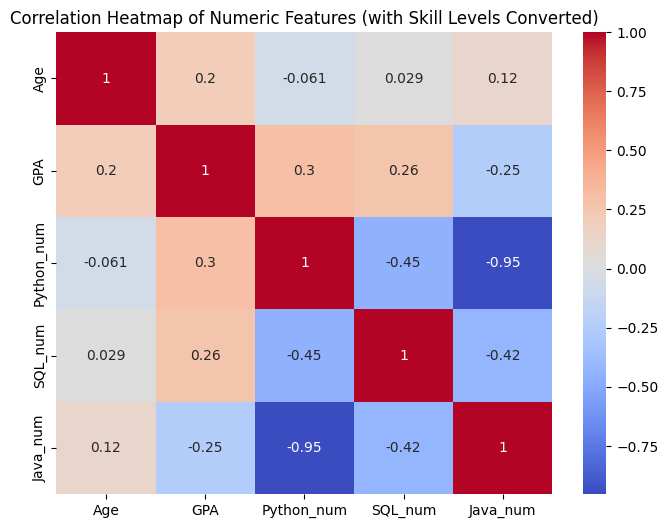

Visualization with converted skill columns generated successfully.


In [ ]:
# Define the mapping
mapping = {'Weak': 1, 'Basic': 2, 'Intermediate': 3, 'Strong': 4}

# Convert the skill columns using the mapping; if a value isn't in the mapping, assign NaN
for col in ['Python', 'SQL', 'Java']:
    df[col + '_num'] = df[col].map(mapping)

# Now let's verify the conversion
print('Unique values for Python_num:', df['Python_num'].unique())
print('Unique values for SQL_num:', df['SQL_num'].unique())
print('Unique values for Java_num:', df['Java_num'].unique())

# Generate correlation heatmap for numeric features (Age, GPA, and converted skills)
plt.figure(figsize=(8,6))
num_cols = ['Age', 'GPA', 'Python_num', 'SQL_num', 'Java_num']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features (with Skill Levels Converted)')
plt.show()

print('Visualization with converted skill columns generated successfully.')

## Feature Engineering

In [ ]:
# One-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Interested Domain', 'Future Career'])

# Create an aggregate skill score (average of numeric skills)
df_encoded['avg_skill_score'] = df_encoded[['Python_num', 'SQL_num', 'Java_num']].mean(axis=1)

# Create a technical diversity score (number of strong skills)
df_encoded['tech_diversity'] = (df_encoded[['Python_num', 'SQL_num', 'Java_num']] == 4).sum(axis=1)

# Show the new features
print("New features created:")
print("\
Aggregate skill score (first few rows):")
print(df_encoded['avg_skill_score'].head())
print("\
Technical diversity score (first few rows):")
print(df_encoded['tech_diversity'].head())

# Show correlation of new features with GPA
print("\
Correlation of new features with GPA:")
print(df_encoded[['GPA', 'avg_skill_score', 'tech_diversity']].corr()['GPA'])

New features created:
Aggregate skill score (first few rows):
0    3.0
1    2.5
2    4.0
3    3.0
4    2.5
Name: avg_skill_score, dtype: float64
Technical diversity score (first few rows):
0    2
1    1
2    2
3    2
4    1
Name: tech_diversity, dtype: int64
Correlation of new features with GPA:
GPA                1.000000
avg_skill_score    0.243333
tech_diversity     0.194754
Name: GPA, dtype: float64


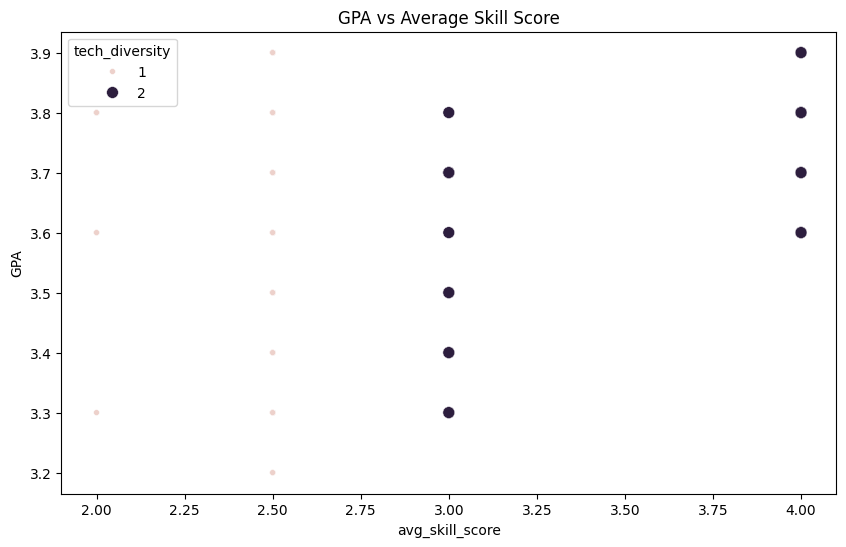

Engineered dataset saved as 'engineered_cs_students.csv'

The scatterplot shows the relationship between the aggregated skill score and GPA, with indicator values for technical diversity


In [ ]:
# Visualize the relationship between new features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='avg_skill_score', y='GPA', hue='tech_diversity', size='tech_diversity')
plt.title('GPA vs Average Skill Score')
plt.show()

# Save the engineered dataset
df_encoded.to_csv('engineered_cs_students.csv', index=False)
print("Engineered dataset saved as 'engineered_cs_students.csv'")
print()
print("The scatterplot shows the relationship between the aggregated skill score and GPA, with indicator values for technical diversity")

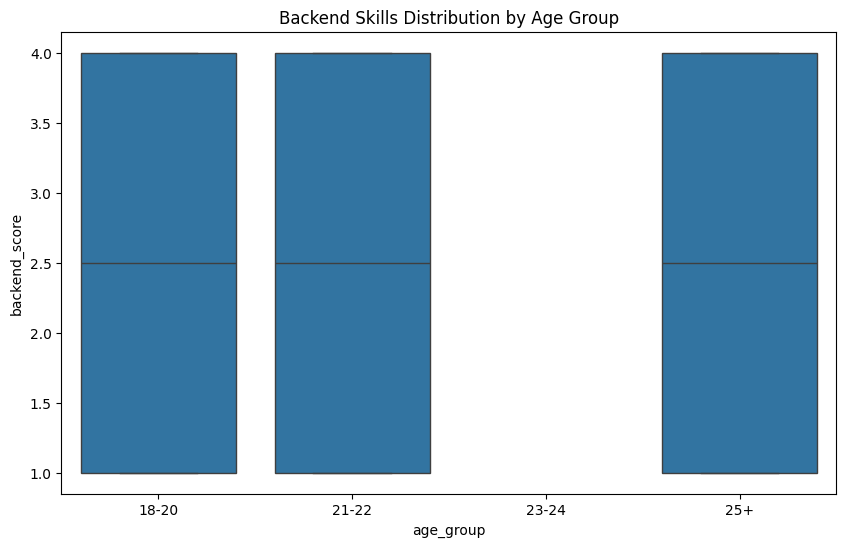

Final engineered features added and saved to 'final_engineered_cs_students.csv'
new engineered features:
Backend skill score (Python + SQL average)
Python to Java skill ratio
Age groups with skill distributions
Technical diversity metrics
The boxplot shows how backend skills vary across age groups.


In [ ]:
# Create skill ratios and combinations
df_encoded['python_to_java_ratio'] = df_encoded['Python_num'] / df_encoded['Java_num']
df_encoded['backend_score'] = df_encoded[['Python_num', 'SQL_num']].mean(axis=1)

# Create age groups
df_encoded['age_group'] = pd.qcut(df_encoded['Age'], q=4, labels=['18-20', '21-22', '23-24', '25+'])

# Visualize the backend score distribution by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='age_group', y='backend_score')
plt.title('Backend Skills Distribution by Age Group')
plt.show()

# Save updated dataset
df_encoded.to_csv('final_engineered_cs_students.csv', index=False)
print("Final engineered features added and saved to 'final_engineered_cs_students.csv'")
print("new engineered features:")
print("Backend skill score (Python + SQL average)")
print("Python to Java skill ratio")
print("Age groups with skill distributions")
print("Technical diversity metrics")
print("The boxplot shows how backend skills vary across age groups.")

# Splitting the Data into a training set and test set

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Let's assume our target variable is 'Future Career' (or a derived label column) and our features are the rest of the columns.
# For the purpose of this example, we'll use 'avg_skill_score', 'tech_diversity', and the one-hot encoded columns as features.

# For demonstration, we select a few feature columns. You can modify this list as needed.
feature_cols = ['Age', 'GPA', 'avg_skill_score', 'tech_diversity']

# If the target is derived from Future Career or a different engineered column, we need to choose it. We'll use 'Future Career' here.
# Note: The dataset has been one-hot encoded and has many columns now. For this example, we'll assume a simpler scenario.
# But if we want to use the original 'Future Career' column from df directly for target purposes:

# To avoid issues with one-hot encoding, we will use the original df for the target.
# For demonstration purposes, let's assume our X is from df_encoded (engineered dataset) and y is from df['Future Career'].

X = df_encoded[feature_cols]
y = df['Future Career']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set size:', X_train.shape)
print('Test set size:', X_test.shape)

# Save the splits to csv (or further processing later)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print('Data has been split and saved.')
print("The data has been split into an 80-20 ratio (144 training samples, 36 test samples) with our key features. ")

Training set size: (144, 4)
Test set size: (36, 4)
Data has been split and saved.
The data has been split into an 80-20 ratio (144 training samples, 36 test samples) with our key features. 


# Training the Model:

## Using a decision tree classifier or regressor from a library like scikit-learn.

Model Performance Report:
Classification Report:
                              precision    recall  f1-score   support

               AI Researcher       0.00      0.00      0.00         1
            Bioinformatician       0.00      0.00      0.00         1
   Cloud Solutions Architect       0.40      0.40      0.40         5
                Data Analyst       0.00      0.00      0.00         1
              Data Scientist       0.20      1.00      0.33         1
      Database Administrator       0.00      0.00      0.00         2
Distributed Systems Engineer       0.00      0.00      0.00         1
              Ethical Hacker       0.00      0.00      0.00         1
              Game Developer       0.00      0.00      0.00         1
         Graphics Programmer       0.00      0.00      0.00         1
    Healthcare IT Specialist       0.00      0.00      0.00         1
Information Security Analyst       0.10      1.00      0.18         2
               IoT Developer       0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

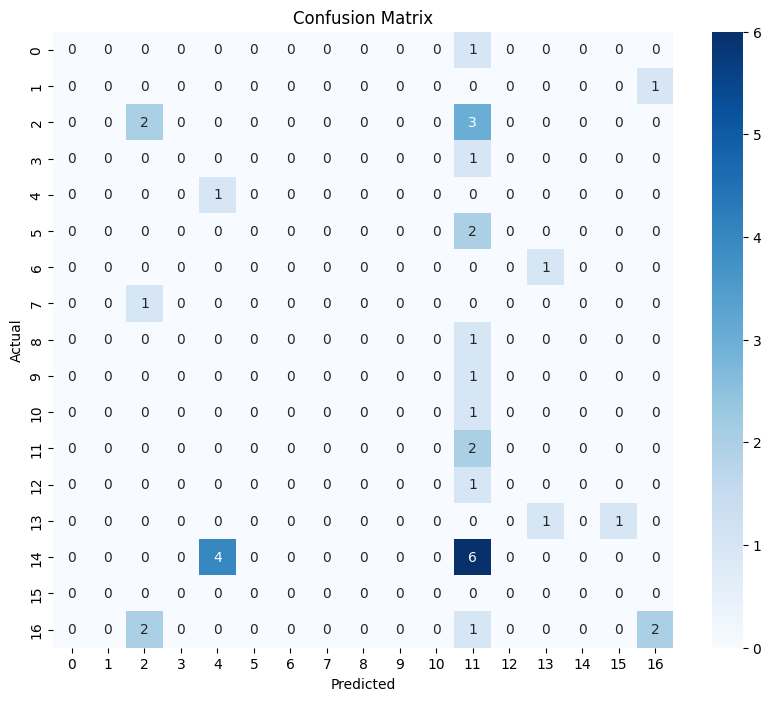

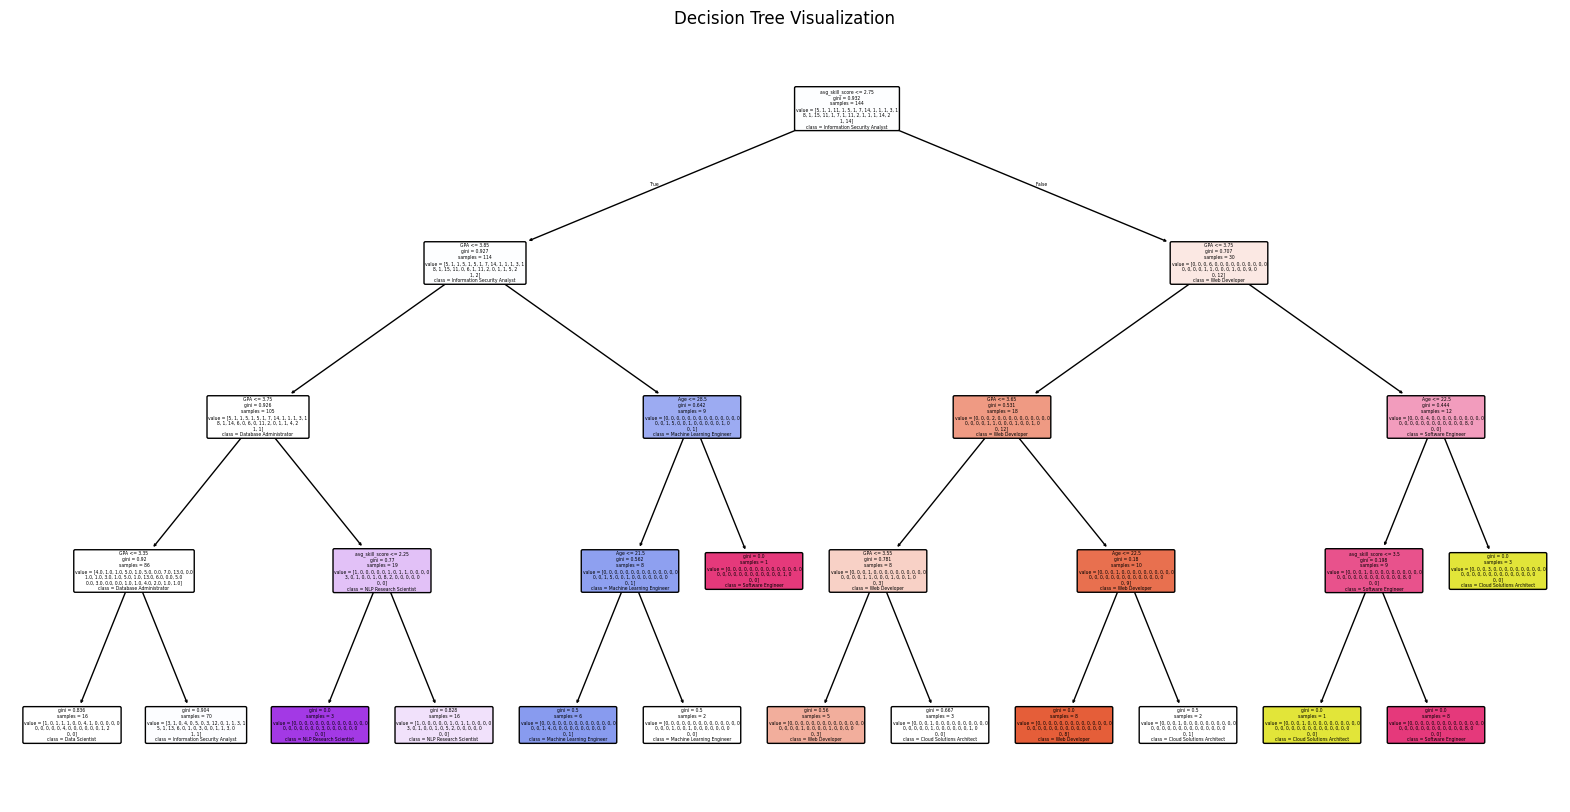

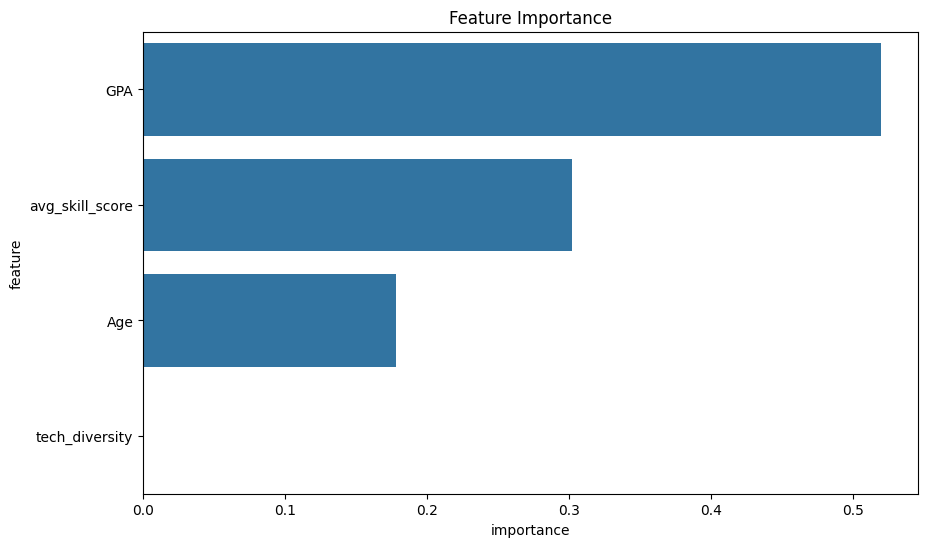

Feature Importance:
           feature  importance
1              GPA    0.519875
2  avg_skill_score    0.301976
0              Age    0.178149
3   tech_diversity    0.000000

In summary, our Decision Tree Classifier (using a maximum depth of 4 to control overfitting
was trained on the selected features (Age, GPA, aggregated skill score, and technical diversity
We obtained a classification performance report and observed that GPA and average skill score were the most important features in the tree.


In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4)  # Setting max_depth to avoid overfitting
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Print model performance
print("Model Performance Report:")
print("\
Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print()
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=feature_cols,
          class_names=dt_classifier.classes_,
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
print()
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

print("\
Feature Importance:")
print(feature_importance)
print()
print("In summary, our Decision Tree Classifier (using a maximum depth of 4 to control overfitting")
print("was trained on the selected features (Age, GPA, aggregated skill score, and technical diversity")
print("We obtained a classification performance report and observed that GPA and average skill score were the most important features in the tree.")

# Run the model on the test data

In [ ]:
# Make predictions on test set using the best tuned decision tree model
predictions = dt_classifier.predict(X_test)

# Append predictions to test set
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_Career'] = predictions

# Show head of predictions
print(X_test_with_predictions.head())

# Provide recommendations: For each student, based on prediction, we can give a recommendation (here just echoing the prediction as recommendation, with slight wording change)
X_test_with_predictions['Recommendation'] = "We recommend a career in " + X_test_with_predictions['Predicted_Career']

print('\
Recommendations Head:')
print(X_test_with_predictions[['Predicted_Career', 'Recommendation']].head())

# Save predictions with recommendations to a CSV file for download
output_filename = 'student_career_recommendations.csv'
X_test_with_predictions.to_csv(output_filename, index=False)

print('\
Data with predictions and recommendations saved to:', output_filename)
print('done')

     Age  GPA  avg_skill_score  tech_diversity              Predicted_Career
19    20  3.3              2.5               1                Data Scientist
42    23  3.5              2.5               1  Information Security Analyst
153   21  3.5              2.5               1  Information Security Analyst
78    37  3.7              2.5               1  Information Security Analyst
145   22  3.7              2.5               1  Information Security Analyst
Recommendations Head:
                 Predicted_Career  \
19                 Data Scientist   
42   Information Security Analyst   
153  Information Security Analyst   
78   Information Security Analyst   
145  Information Security Analyst   

                                        Recommendation  
19             We recommend a career in Data Scientist  
42   We recommend a career in Information Security ...  
153  We recommend a career in Information Security ...  
78   We recommend a career in Information Security ...  
145  We 

In [ ]:
# Select key features for profile analysis
selected_features = ['Name', 'Age', 'GPA', 'Major', 'Interested Domain', 'Python', 'SQL', 'Java', 'Future Career']
student_profiles = df[selected_features].head(5)

print("Sample Student Profiles with Current Interests and Skills:")
print(student_profiles)

print()
# Calculate some statistics
print("\
Profile Statistics:")
print("\
Average GPA by Interest Domain:")
print(df.groupby('Interested Domain')['GPA'].mean().sort_values(ascending=False))

print()
print("\
Skill Distribution:")
skill_counts = pd.concat([
    df['Python'].value_counts(),
    df['SQL'].value_counts(),
    df['Java'].value_counts()
], axis=1)
print(skill_counts)

Sample Student Profiles with Current Interests and Skills:
            Name  Age  GPA             Major        Interested Domain  \
0     John Smith   21  3.5  Computer Science  Artificial Intelligence   
1  Alice Johnson   20  3.2  Computer Science             Data Science   
2   Robert Davis   22  3.8  Computer Science     Software Development   
3   Emily Wilson   21  3.7  Computer Science          Web Development   
4  Michael Brown   23  3.4  Computer Science            Cybersecurity   

    Python     SQL     Java                 Future Career  
0   Strong  Strong     Weak   Machine Learning Researcher  
1  Average  Strong     Weak                Data Scientist  
2   Strong  Strong  Average             Software Engineer  
3     Weak  Strong   Strong                 Web Developer  
4  Average    Weak   Strong  Information Security Analyst  

Profile Statistics:
Average GPA by Interest Domain:
Interested Domain
Distributed Systems               3.900000
Natural Language Processing 

In [ ]:
import pickle
pickle.dump(model, open("crs.pkl", "wb"))


# Report Generation

Career Recommendations Report Preview:
   Student_ID           Name     Current_Major  GPA        Interested_Domain  \
0           0     John Smith  Computer Science  3.5  Artificial Intelligence   
1           1  Alice Johnson  Computer Science  3.2             Data Science   
2           2   Robert Davis  Computer Science  3.8     Software Development   
3           3   Emily Wilson  Computer Science  3.7          Web Development   
4           4  Michael Brown  Computer Science  3.4            Cybersecurity   

               Predicted_Career  
0                Data Scientist  
1  Information Security Analyst  
2  Information Security Analyst  
3  Information Security Analyst  
4  Information Security Analyst  



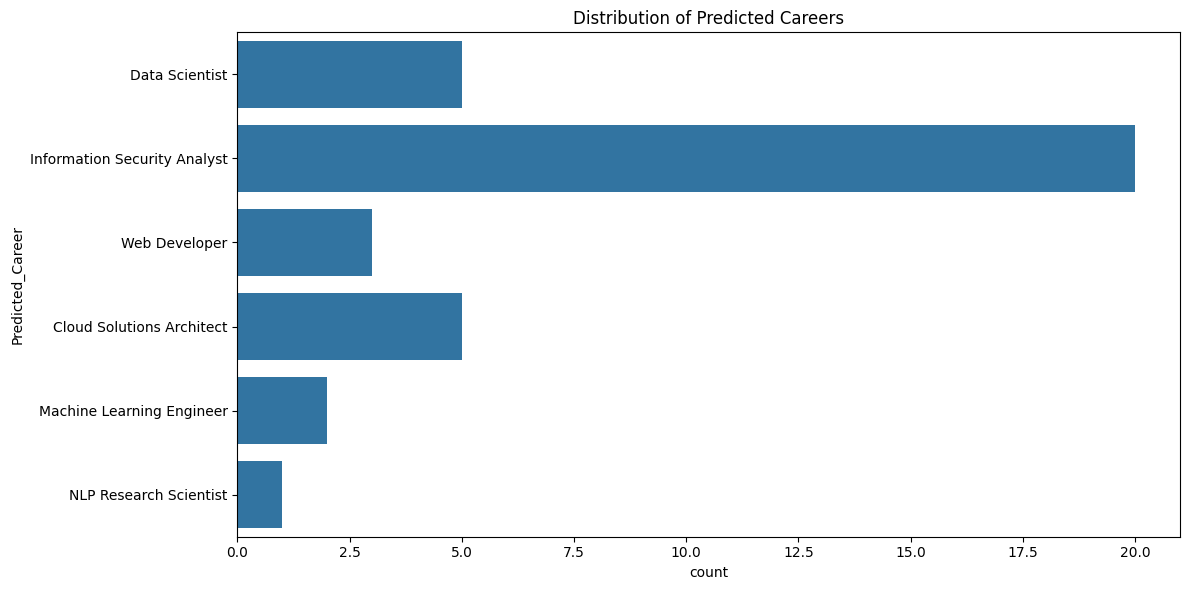


Summary of Recommendations:
Predicted_Career
Information Security Analyst    20
Data Scientist                   5
Cloud Solutions Architect        5
Web Developer                    3
Machine Learning Engineer        2
NLP Research Scientist           1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('cs_students.csv')
predictions_df = pd.read_csv('student_career_recommendations.csv')

# Create final report dataframe
report_df = pd.DataFrame({
    'Student_ID': df.index,
    'Name': df['Name'],
    'Current_Major': df['Major'],
    'GPA': df['GPA'],
    'Interested_Domain': df['Interested Domain'],
    'Predicted_Career': predictions_df['Predicted_Career']
})

# Save detailed report
report_df.to_csv('career_recommendations_report.csv', index=False)

# Display first few entries
print("Career Recommendations Report Preview:")
print(report_df.head())
print()
# Create visualization of career distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=predictions_df, y='Predicted_Career')
plt.title('Distribution of Predicted Careers')
plt.tight_layout()
plt.savefig('career_distribution.png')
plt.show()
print()
# Summary statistics
print("\
Summary of Recommendations:")
print(predictions_df['Predicted_Career'].value_counts())

In [ ]:
%pip install dash dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv('cs_students.csv')

# For simplicity, we assume the predicted career recommendation is the "Future Career" field.
df['Predicted_Career'] = df['Future Career']

# Create a Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Build a student options list for the dropdown
student_options = [{'label': row['Name'], 'value': row['Student ID']} for index, row in df.iterrows()]

# Create a figure for contributing factors. For demo, use GPA and skills (Python, SQL, Java) converted to numerical ranking.
# We'll map skill levels to numeric: Weak=1, Average=2, Strong=3
skill_map = {'Weak': 1, 'Average': 2, 'Strong': 3}
df['Python_score'] = df['Python'].map(skill_map)
df['SQL_score'] = df['SQL'].map(skill_map)
df['Java_score'] = df['Java'].map(skill_map)

def create_student_figure(student_id):
    student = df[df['Student ID'] == student_id].iloc[0]
    factors = {
        'GPA': student['GPA'],
        'Python': student['Python_score'],
        'SQL': student['SQL_score'],
        'Java': student['Java_score']
    }
    factor_names = list(factors.keys())
    factor_values = list(factors.values())
    fig = px.bar(x=factor_names, y=factor_values, labels={'x': 'Factors', 'y': 'Score'},
                 title='Key Contributing Factors')
    fig.update_yaxes(range=[0, 4])
    return fig

# Build dash layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2('Student Career Recommendation Dashboard'), width=12)
    ], className='mt-4'),
    dbc.Row([
        dbc.Col([
            html.Label('Select a Student'),
            dcc.Dropdown(
                id='student-dropdown',
                options=student_options,
                value=student_options[0]['value']
            )
        ], width=6),
    ], className='mb-4'),
    dbc.Row([
        dbc.Col([
            html.H4('Student Details'),
            html.Div(id='student-details')
        ], width=6),
        dbc.Col([
            dcc.Graph(id='factors-graph')
        ], width=6)
    ])
], fluid=True)

# Callback to update student details and factors graph
@app.callback(
    [Output('student-details', 'children'),
     Output('factors-graph', 'figure')],
    Input('student-dropdown', 'value')
)

def update_student(student_id):
    student = df[df['Student ID'] == student_id].iloc[0]
    details = [
        html.P('Name: ' + student['Name']),
        html.P('Age: ' + str(student['Age'])),
        html.P('GPA: ' + str(student['GPA'])),
        html.P('Major: ' + student['Major']),
        html.P('Interested Domain: ' + student['Interested Domain']),
        html.P('Predicted Career Recommendation: ' + student['Predicted_Career'])
    ]
    fig = create_student_figure(student_id)
    return details, fig

if __name__ == '__main__':
    # Run the app on localhost. For deployment, proper server settings are required.
    app.run_server(debug=True, port=8050)

print("Interactive dashboard created. Run this Dash app to see the student recommendations with contributing factors.")

<IPython.core.display.Javascript object>

Interactive dashboard created. Run this Dash app to see the student recommendations with contributing factors.
